In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/iris.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### Data Manipulation

In [4]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

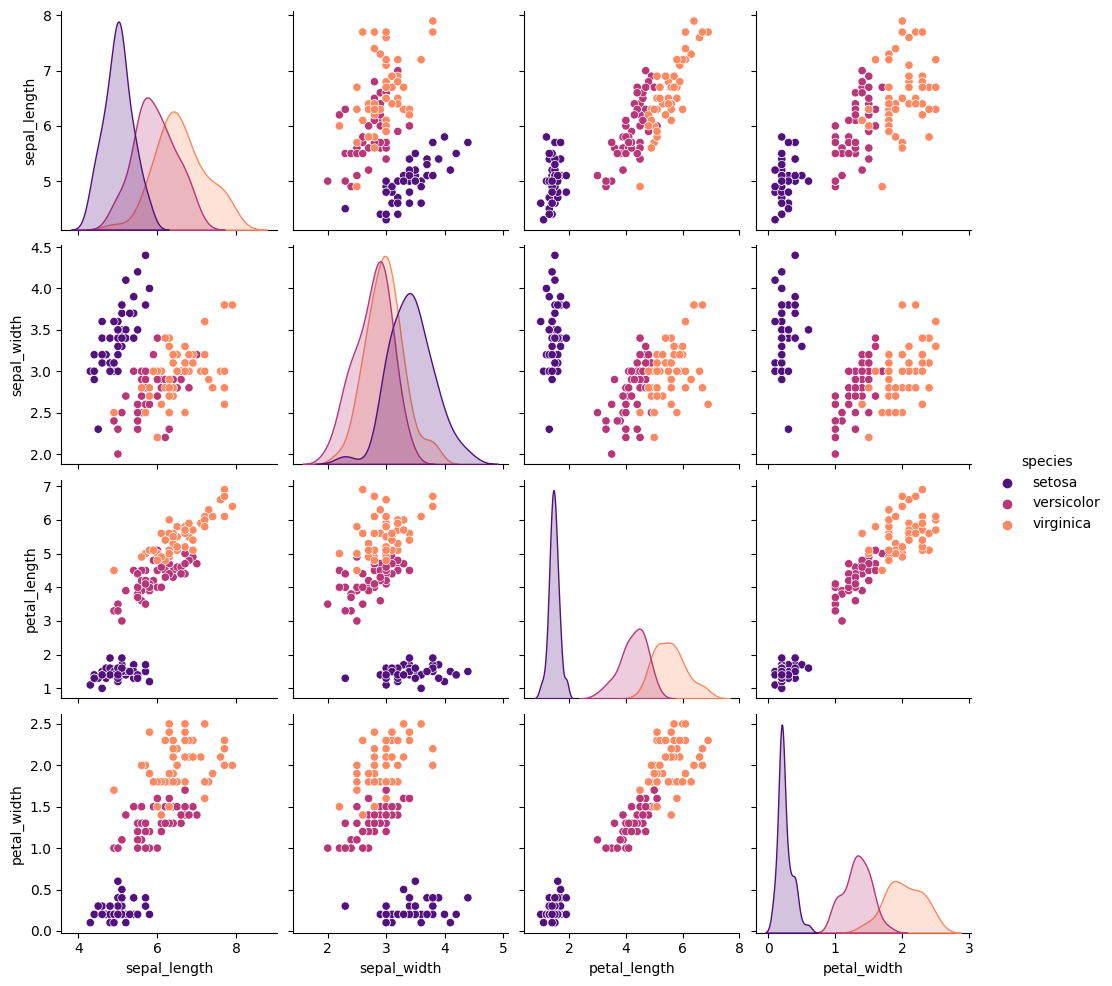

In [5]:
sns.pairplot(data = iris_df, hue = 'species', palette = 'magma')

##### Train & Test Split

In [6]:
X = iris_df.drop('species', axis = 1)
Y = iris_df['species']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

###### Support Vector Classifier

##### Kernel Trick = 'linear'
    * kernel = 'linear'
    * C value, Higher the 'C' value decision boundry will be hard margin, Lower the C value decision boundry will be soft margin.
    * For multiclass classification choose option b/w 'ovr' (one vs. rest all) and ovo (one vs. another class.)

In [8]:
from sklearn.svm import SVC
svc_model = SVC(C = 1e4, kernel = 'linear',decision_function_shape = 'ovr' )

In [9]:
svc_model.fit(x_train, y_train)

SVC(C=10000.0, kernel='linear')

In [10]:
svc_model.score(x_test, y_test)

1.0

In [ ]:
predictions = svc_model.predict(x_test)
predictions

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

##### Kernel Trick = 'RBF'
    * kernel = 'rbf'
    * C value, Higher the 'C' value decision boundry will be hard margin, Lower the C value decision boundry will be soft margin.
    * For multiclass classification choose option b/w 'ovr' (one vs. rest all) and ovo (one vs. another class.)

In [25]:
svc_model = SVC(C = 1, kernel = 'rbf', decision_function_shape = 'ovr' )

In [26]:
svc_model.fit(x_train,y_train)

SVC(C=1)

In [27]:
svc_model.score(x_test, y_test)

0.9777777777777777

In [29]:
predictions = svc_model.predict(x_test)
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]])

<Axes: >

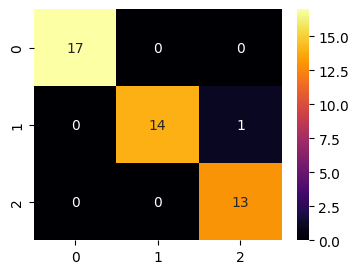

In [34]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt = '0.0f', cmap = 'inferno')

##### kernel = 'Polynomial'

In [35]:
svc_model = SVC(C = 1e2, kernel = 'poly', degree = 2, decision_function_shape = 'ovr' )

In [36]:
svc_model.fit(x_train, y_train)

SVC(C=100.0, degree=2, kernel='poly')

In [37]:
svc_model.score(x_test, y_test)

1.0

In [38]:
predictions = svc_model.predict(x_test)
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

<Axes: >

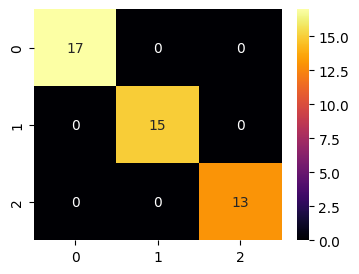

In [40]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt = '0.0f', cmap = 'inferno')

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

